## Some tests for filtering

In [1]:
from Thymio import Thymio
from Filtering import Filtering
from Robot import Robot
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [44]:
Ts = 0.1
phi = m.pi/4 # in degrees

A = np.eye(4)
A[0][2] = Ts
A[1][3] = Ts


B = np.eye(2)

robot = Robot(A,B)

#Variance on Vx and Vy measures considering results of TP8 and splitting variance on speed split between x and y 

r = 6.15/4
Rvel = np.eye(2)*r


#Variance on camera measures (totally arbitrary value)

Rcam = np.eye(2)*0.1



#Variance on Vx and Vy state considering white noise

q = 6.15/4 
Q = np.zeros((4,4))

Q[0][0] = q*(Ts**3)/3 
Q[0][2] = q*(Ts**2)/2 
Q[1][1] = q*(Ts**3)/3 
Q[1][3] = q*(Ts**2)/2
Q[2][0] = q*(Ts**2)/2
Q[2][2] = q*Ts
Q[3][1] = q*(Ts**2)/2
Q[3][3] = q*Ts

print(Q)

Hvel = np.zeros((2,4))
Hvel[0][2] = 1
Hvel[1][3] = 1

print(Hvel)


[[0.0005125 0.        0.0076875 0.       ]
 [0.        0.0005125 0.        0.0076875]
 [0.0076875 0.        0.15375   0.       ]
 [0.        0.0076875 0.        0.15375  ]]
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [45]:
Kalman = Filtering(Rvel,Rcam,Q,robot,Hvel)

In [46]:
# Real values of Vx,Vy with V = cst = 50 mm/s
Vx = 50*m.cos(phi)

Vy = 50*m.sin(phi)

# Noisy values of Vx and Vy for 2s at a sampling rate of 0.1s

Vx_noisy = Vx + np.random.normal(0,r,200)
Vy_noisy = Vy + np.random.normal(0,r,200)

# Uncomment to plot Vx,Vy and their noise over time

VxR = np.ones((200,1))*Vx
#Vy = np.ones((200,1))*Vy

#plt.plot(Vx_noisy,'b')
#plt.plot(Vx, 'b')
#plt.plot(Vy, 'r')
#plt.plot(Vy_noisy,'g')
#plt.show




# X,Y

X=[]
Y=[]
X_noisy = []
Y_noisy = []
statesEst = np.zeros((4,1))
Xest = []
Yest = []
Vxest = []
Vyest = []
for i in np.arange(0,20,Ts):
    k = int(i*10)
    X.append(Vx*i)
    Y.append(Vy*i)
    states_measured = np.array([[Vx_noisy[k],Vy_noisy[k]]]).T
    Xcam = np.array([[X[k]+np.random.normal(0,8),Y[k]+ np.random.normal(0,8)]]).T

    statesEst = Kalman.kalmanRectiligne(Xcam, statesEst, states_measured)
    
    
    Xest.append(statesEst[0])
    Yest.append(statesEst[1])
    Vxest.append(statesEst[2])
    Vyest.append(statesEst[3]) 


<function matplotlib.pyplot.show(close=None, block=None)>

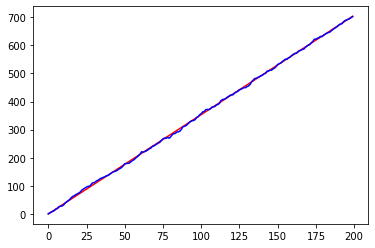

In [47]:
plt.plot(X,'r')
plt.plot(Xest,'b')

#plt.plot(Vx_noisy,'g')
plt.show